In [3]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/mnt/lareaulab/reliscu/code")

from parse_gtf import *

In [4]:
psi_data = "SyntheticDataset1_20pcntCells_35SD_200samples_SJ_pseudobulk_min_observed0.05_minPsi0.05_PSI"

In [5]:
psi = pd.read_csv(f"data/tasic_2018_ALM_STAR_{psi_data}.csv", index_col=0)
top_qval_mods_df = pd.read_csv("data/tasic_2018_ALM_STAR_donor_cell_type_pseudobulk_pairwise_DE_genes_dream_20pcntCells_35SD_200samples_log2_pseudobulk_PosBC_top_Qval_modules.csv")

### Add gene names to PSI data

In [6]:
# Parse GTF attribute column
gtf_file = "/mnt/lareaulab/reliscu/data/GENCODE/GRCm39/gencode.vM35.annotation.gtf"
gtf = gtf_parse(gtf_file)
gtf_subset = gtf.loc[gtf['feature'].isin(["gene"])]
attrs = gtf_subset["attribute"].apply(extract_attributes)
attrs_df = attrs.apply(pd.Series)
gtf_parsed = pd.concat([gtf_subset.drop(columns=["attribute"]), attrs_df], axis=1)

In [7]:
# Get PSI and GTF data ready to merge on gene IDs
gtf_parsed['gene_id'] = gtf_parsed['gene_id'].str.split(".").str[0]
psi['gene_id'] = psi.index.str.split("_").str[0]
psi['exon_id'] = psi.index.values

In [8]:
psi_anno = pd.merge(gtf_parsed[['gene_id', 'gene_name']], psi, on="gene_id", how="right")
psi_anno = psi_anno.set_index("exon_id").rename_axis(None)
psi_anno = psi_anno.drop(columns=["gene_id"])

### Calc. corr between ME and exon PSI

In [ ]:
# corr_df = pd.DataFrame(
#     columns=["Gene"] + top_qval_mods_df['Cell_type'].tolist(), 
#     index=psi_anno.index
# )
# corr_df['Gene'] = psi_anno['gene_name'] 

# for i, row in top_qval_mods_df.iterrows():
#     ctype = row['Cell_type']

#     mod_df = pd.read_csv(row['ME_path'])
#     mod_eig = mod_df.set_index("Sample")[row['Module']]
#     mod_eig = pd.to_numeric(mod_eig, errors="coerce")
    
#     corrs = psi_anno.iloc[:, 1:].corrwith(mod_eig, axis=1)
#     corr_df[ctype] = corrs

In [ ]:
# corr_df.to_csv(f"data/tasic_2018_ALM_STAR_{psi_data}_exon_corr.csv")

In [16]:
corr_df.sort_values(ctype, ascending=True)[0:10]

,Gene,Astro,Endo,Macrophage,Oligo,VLMC,SMC,Pvalb,Lamp5,Vip,...,L2_3_IT,CR,L6_CT,Peri,L6_IT,L5_PT,Serpinf1,L6b,L4,Meis2
ENSMUSG00000032826_ProteinCoding_8,Ank2,-0.897754,0.092096,-0.084464,0.004554,-0.067002,0.095626,0.008850,0.078013,0.081768,...,-0.025650,0.090029,-0.020380,-0.149061,0.203463,0.043351,0.058063,0.098445,-0.101895,0.087088
ENSMUSG00000022763_ProteinCoding_2,Aifm3,-0.891470,0.073659,0.007199,0.071941,-0.204989,0.113349,0.056649,-0.021487,0.079307,...,-0.114597,0.010899,0.047775,-0.153441,0.226016,0.089895,0.113928,0.039916,0.047866,-0.059844
ENSMUSG00000004558_ProteinCoding_1,Ndrg2,-0.877491,0.115330,0.013368,-0.033453,-0.111738,-0.133083,0.165462,0.075232,0.190327,...,-0.120794,0.076684,0.016599,-0.354358,0.169966,0.042611,0.099757,0.122935,-0.123050,0.014790
ENSMUSG00000020859_ProteinCoding_3,Spag9,-0.856242,-0.022581,-0.006303,-0.284553,-0.134155,0.058919,0.183323,0.154051,0.167975,...,-0.122249,0.002095,0.049028,-0.167071,0.156698,0.069780,0.070389,0.061610,-0.026891,-0.099129
ENSMUSG00000032076_ProteinCoding_5,Cadm1,-0.842076,0.091217,-0.024019,-0.107206,-0.060943,0.100103,0.125190,-0.024884,-0.063640,...,0.046015,0.062279,0.087803,-0.140265,0.282851,0.176332,-0.016184,0.052171,-0.023110,0.006099
ENSMUSG00000036879_ProteinCoding_1,Phkb,-0.828355,0.055058,-0.040228,-0.163732,-0.323919,0.073392,0.182031,0.169497,0.211473,...,-0.090540,0.038477,-0.023643,-0.159111,0.103410,0.011941,0.117370,0.068186,-0.022844,0.077211
ENSMUSG00000036879_other_1,Phkb,-0.828243,0.054388,-0.036100,-0.169864,-0.326580,0.071412,0.183008,0.172175,0.214186,...,-0.089348,0.024339,-0.022345,-0.162064,0.101725,0.007660,0.117985,0.070179,-0.023093,0.073757
ENSMUSG00000096054_ProteinCoding_2,Syne1,-0.823658,-0.015691,-0.013402,0.078170,0.016753,0.098497,0.094157,0.056499,0.191473,...,-0.081290,0.107335,-0.003029,-0.534793,0.209468,0.051724,0.117029,0.044144,-0.056533,0.004534
ENSMUSG00000060961_ProteinCoding_2,Slc4a4,-0.817320,0.068949,-0.001019,0.042663,-0.044565,0.063600,0.096772,0.043012,0.140240,...,-0.072364,0.064622,0.013472,-0.119145,0.152149,0.062430,0.048265,0.056400,-0.098172,0.022298
ENSMUSG00000029778_ProteinCoding_4,Adcyap1r1,-0.793127,0.131013,-0.063131,0.066545,-0.036565,0.062733,0.113341,0.082036,0.128619,...,-0.120831,0.012047,-0.082983,-0.145096,0.166620,-0.008865,0.082024,0.120026,-0.072571,0.012336


### Plot PSI vs. ME

In [14]:
corr_df = pd.read_csv(f"data/tasic_2018_ALM_STAR_{psi_data}_exon_corr.csv", index_col=0)

In [20]:
corr_df.loc[exon, 'Gene'] 

'Ank2'

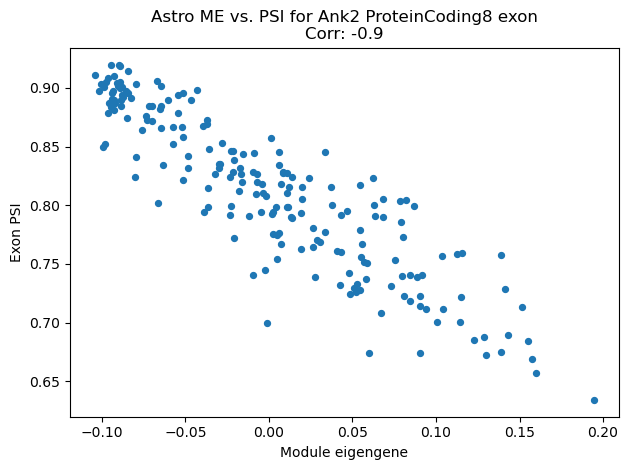

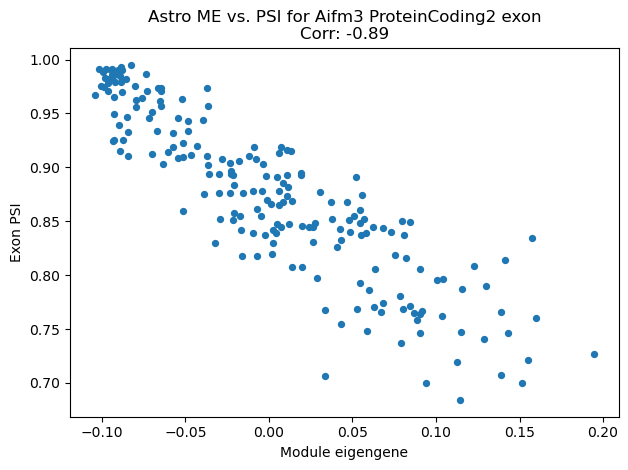

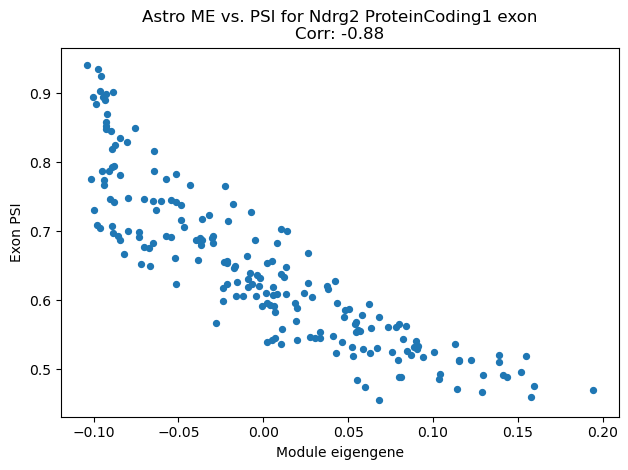

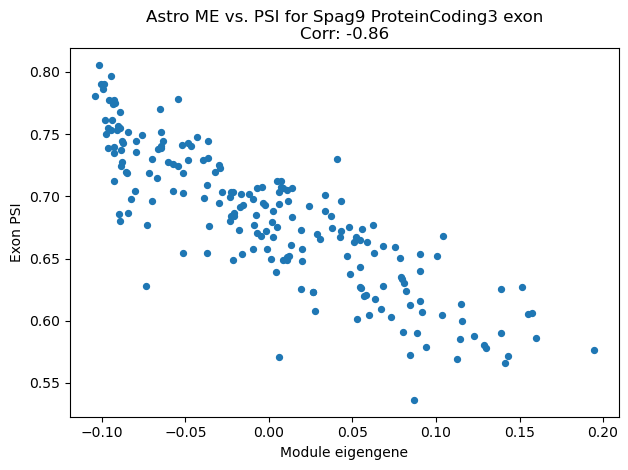

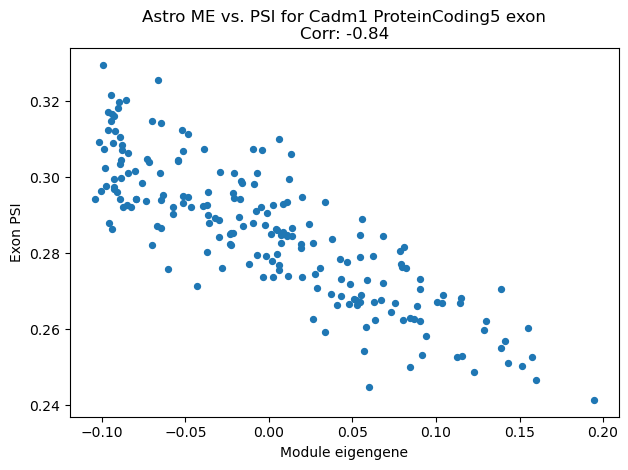

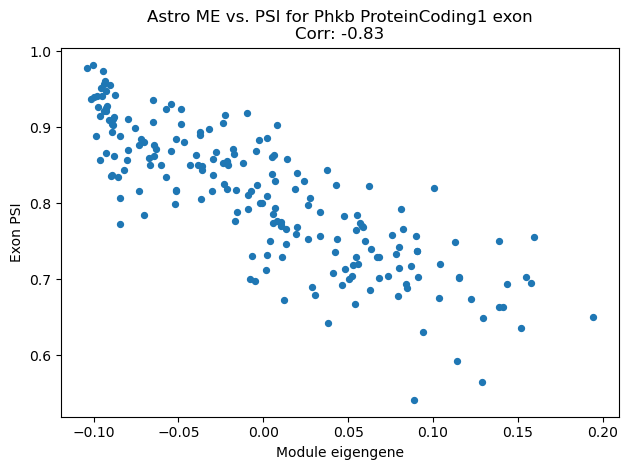

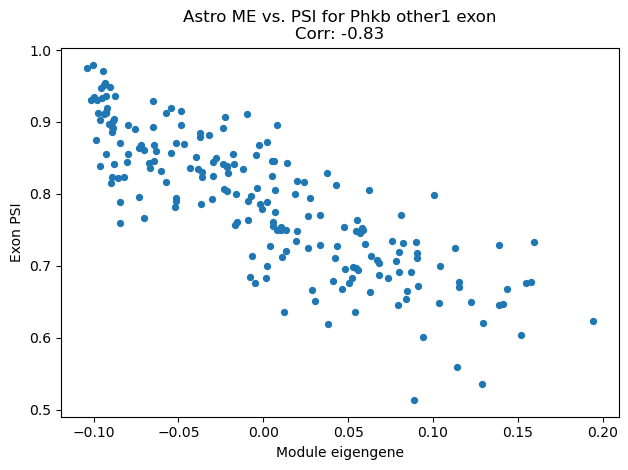

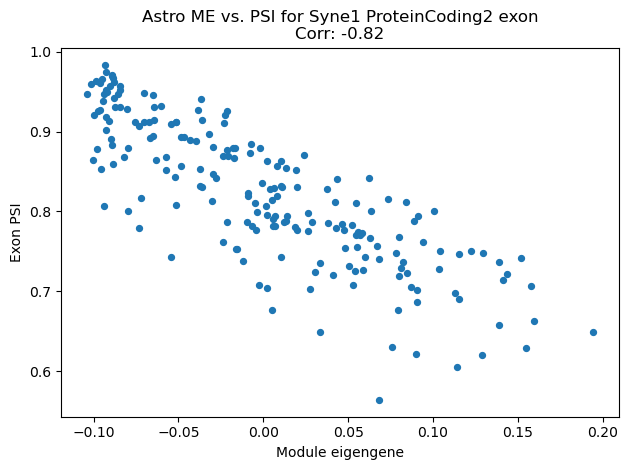

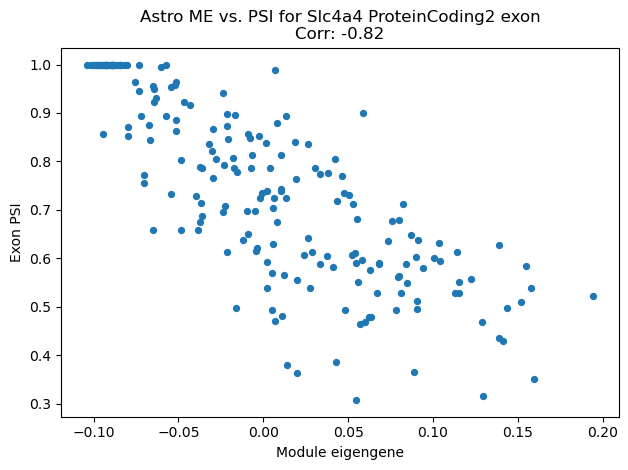

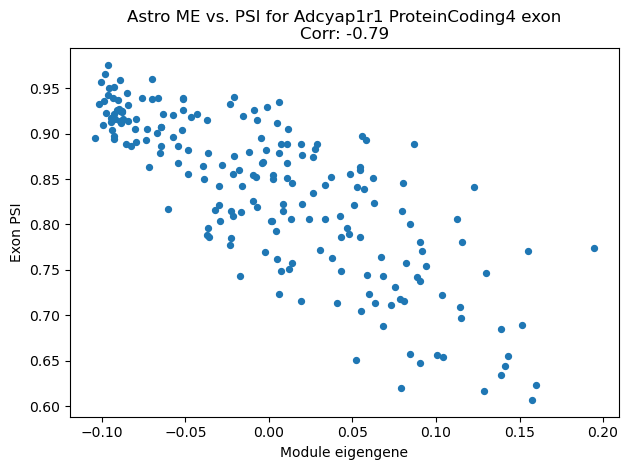

In [ ]:


def plot_ME_vs_PSI(mod_eig, corr_df, ascending=True, top_n=10):
    corr_df = corr_df.sort_values(ctype, ascending=True)[0:top_n]
    
    for exon in corr_df.index:
        exon_psi = psi.loc[exon, psi_anno.columns[1:]]

        corr = round(corr_df.loc[exon, ctype], 2)
        gene_label = corr_df.loc[exon, 'Gene'] 
        exon_label = ''.join(exon.split("_")[1:])

        fig, ax = plt.subplots()

        ax.scatter(mod_eig, exon_psi, s=18)
        ax.set_xlabel("Module eigengene")
        ax.set_ylabel("Exon PSI")
        ax.set_title(f"{ctype} ME vs. PSI for {gene_label} {exon_label} exon\nCorr: {corr}")

        plt.tight_layout()
        plt.show()
        
        

for idx, row in top_qval_mods_df.iterrows():
    ctype = row['Cell_type']
    
    mod_df = pd.read_csv(row['ME_path'])
    mod_eig_df = mod_df.set_index("Sample")[row['Module']]
    mod_eig = pd.to_numeric(mod_eig_df, errors="coerce")
   
    plot_ME_vs_PSI(mod_eig, corr_df)
    break    
    
       

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr  # optional

def scatter_exon_vs_ME(exon_series, mod_eig, title=None, out=None):
    # Align by shared samples (index names)
    s = exon_series.astype(float)
    m = mod_eig.astype(float)

    shared = s.index.intersection(m.index)
    if len(shared) < 2:
        return  # not enough points to plot

    x = s.loc[shared].to_numpy()
    y = m.loc[shared].to_numpy()

    # Drop pairwise NaNs
    ok = np.isfinite(x) & np.isfinite(y)
    x, y = x[ok], y[ok]
    if x.size < 2:
        return

    # Optional: correlation
    r, p = pearsonr(x, y)

    # Plot
    fig, ax = plt.subplots()
    ax.scatter(x, y, s=18)
    ax.set_xlabel("Exon PSI")
    ax.set_ylabel("Module eigengene")
    ttl = title or "Exon vs ME"
    ax.set_title(f"{ttl}  (r={r:.2f}, p={p:.1e})")

    # Optional: simple least-squares line
    if x.size >= 2:
        coef = np.polyfit(x, y, 1)
        xx = np.linspace(x.min(), x.max(), 100)
        ax.plot(xx, np.polyval(coef, xx), linewidth=2)

    plt.tight_layout()
    if out:
        plt.savefig(out, dpi=300)
    plt.show()
